In [15]:
import pandas as pd
import seaborn as sns


In [16]:
path='/content/Data Set- Inc5000 Company List_2014.csv'
df=pd.read_csv(path)

In [17]:
df.head(2)

,_input,_num,_widgetName,_source,_resultNumber,_pageUrl,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,yrs_on_list
0,NaN,1,Inc5000 Company List,Inc5000 Company List,1,http://www.inc.com/inc5000list/json/inc5000_20...,22890,1,227,Fuhu,fuhu,California,CA,El Segundo,Los Angeles,158956.9106,195640000,Consumer Products & Services,2
1,NaN,2,Inc5000 Company List,Inc5000 Company List,2,http://www.inc.com/inc5000list/json/inc5000_20...,25747,2,191,Quest Nutrition,quest-nutrition,California,CA,El Segundo,Los Angeles,57347.9246,82640563,Food & Beverage,1


#  **Task 2.2 Data Preparation**

In [18]:
df.shape

(5000, 19)

In [19]:
df.head(2)

,_input,_num,_widgetName,_source,_resultNumber,_pageUrl,id,rank,workers,company,url,state_l,state_s,city,metro,growth,revenue,industry,yrs_on_list
0,NaN,1,Inc5000 Company List,Inc5000 Company List,1,http://www.inc.com/inc5000list/json/inc5000_20...,22890,1,227,Fuhu,fuhu,California,CA,El Segundo,Los Angeles,158956.9106,195640000,Consumer Products & Services,2
1,NaN,2,Inc5000 Company List,Inc5000 Company List,2,http://www.inc.com/inc5000list/json/inc5000_20...,25747,2,191,Quest Nutrition,quest-nutrition,California,CA,El Segundo,Los Angeles,57347.9246,82640563,Food & Beverage,1


## **Data Cleaning**

In [20]:
df.columns

Index(['_input', '_num', '_widgetName', '_source', '_resultNumber', '_pageUrl',
       'id', 'rank', 'workers', 'company', 'url', 'state_l', 'state_s', 'city',
       'metro', 'growth', 'revenue', 'industry', 'yrs_on_list'],
      dtype='object')

### Drop irrelevant Columns

In [21]:
df=df.drop(['_input', '_num', '_widgetName', '_source', '_resultNumber', '_pageUrl',
       'id', 'rank','url','state_s','city',
       'metro','yrs_on_list'],axis=1)

In [22]:
df.head(3)

,workers,company,state_l,growth,revenue,industry
0,227,Fuhu,California,158956.9106,195640000,Consumer Products & Services
1,191,Quest Nutrition,California,57347.9246,82640563,Food & Beverage
2,145,Reliant Asset Management,Virginia,55460.1646,85076502,Business Products & Services


In [23]:
df.shape
#now we have only six columns

(5000, 6)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   workers   5000 non-null   int64  
 1   company   5000 non-null   object 
 2   state_l   5000 non-null   object 
 3   growth    5000 non-null   float64
 4   revenue   5000 non-null   int64  
 5   industry  5000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [25]:
null=df.isnull().sum()
null
#there is no null values in data

workers     0
company     0
state_l     0
growth      0
revenue     0
industry    0
dtype: int64

In [26]:
df.describe()

,workers,growth,revenue
count,5000.000000,5000.000000,5.000000e+03
mean,208.969800,516.439892,4.305818e+07
std,1074.600125,2786.061791,1.818559e+08
min,0.000000,42.447000,1.953000e+06
25%,24.000000,84.208250,4.876791e+06
50%,50.000000,151.722800,1.072208e+07
75%,125.000000,347.652825,2.695213e+07
max,34219.000000,158956.910600,5.528203e+09


In [27]:
df['workers'].max()
#there is 34219 workers one of a company which is highest

34219

In [28]:
df.duplicated().sum()
#There is also no duplicate values

0

In [29]:
df.skew()
#There is positively skewed data

<ipython-input-29-3ea2569cf1e1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


workers    19.835568
growth     40.795186
revenue    17.002107
dtype: float64

# Data Transformation

In [30]:
# create a new column containing the revenue values in millions
df['Revenue (in millions)'] = df['revenue'] / 1000000
df['Revenue_million']=df['Revenue (in millions)'].round(2)


In [31]:
df.head(5)

,workers,company,state_l,growth,revenue,industry,Revenue (in millions),Revenue_million
0,227,Fuhu,California,158956.9106,195640000,Consumer Products & Services,195.640000,195.64
1,191,Quest Nutrition,California,57347.9246,82640563,Food & Beverage,82.640563,82.64
2,145,Reliant Asset Management,Virginia,55460.1646,85076502,Business Products & Services,85.076502,85.08
3,62,Superfish,California,26042.9630,35293000,Software,35.293000,35.29
4,92,Acacia Communications,Massachusetts,20690.4578,77652360,Telecommunications,77.652360,77.65


In [32]:
df['Growth']=df['growth'].round(0)
#we removed decimals from growth by creating new column

In [33]:
df.head(2)

,workers,company,state_l,growth,revenue,industry,Revenue (in millions),Revenue_million,Growth
0,227,Fuhu,California,158956.9106,195640000,Consumer Products & Services,195.640000,195.64,158957.0
1,191,Quest Nutrition,California,57347.9246,82640563,Food & Beverage,82.640563,82.64,57348.0


In [34]:
#converting growth into percentage in new column
Total=2582199.4611
df['growth_percen']=df['Growth']*100/df['Growth'].sum()
df['growth_percent']=df['growth_percen'].round(0)

In [35]:
df.head(3)

,workers,company,state_l,growth,revenue,industry,Revenue (in millions),Revenue_million,Growth,growth_percen,growth_percent
0,227,Fuhu,California,158956.9106,195640000,Consumer Products & Services,195.640000,195.64,158957.0,6.155865,6.0
1,191,Quest Nutrition,California,57347.9246,82640563,Food & Beverage,82.640563,82.64,57348.0,2.220893,2.0
2,145,Reliant Asset Management,Virginia,55460.1646,85076502,Business Products & Services,85.076502,85.08,55460.0,2.147778,2.0


In [36]:
#now we remove these columns relating to growth & revenue
df=df.drop(['growth','revenue','Revenue (in millions)','Growth','growth_percen'],axis=1)

In [37]:
#now we have revenue in millions and growth in percentage
df.head(3)

,workers,company,state_l,industry,Revenue_million,growth_percent
0,227,Fuhu,California,Consumer Products & Services,195.64,6.0
1,191,Quest Nutrition,California,Food & Beverage,82.64,2.0
2,145,Reliant Asset Management,Virginia,Business Products & Services,85.08,2.0


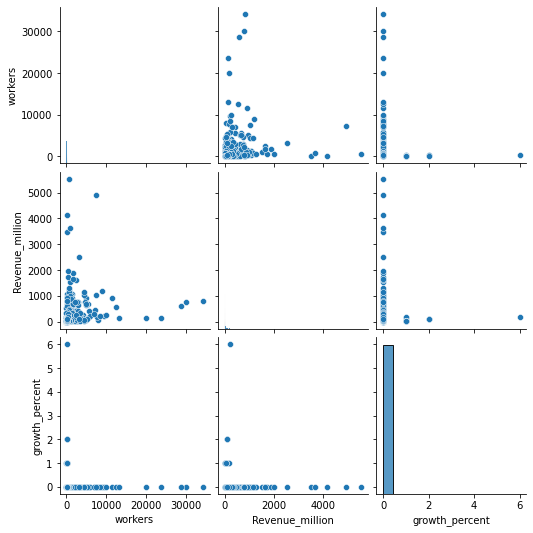

In [38]:
sns.pairplot(data=df)
# Here data is positively skewed.

<Axes: xlabel='workers', ylabel='Revenue_million'>

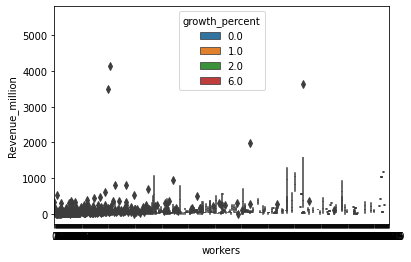

In [52]:
sns.boxplot(data=df,x='workers',y='Revenue_million',hue='growth_percent')

<Axes: xlabel='workers', ylabel='Revenue_million'>

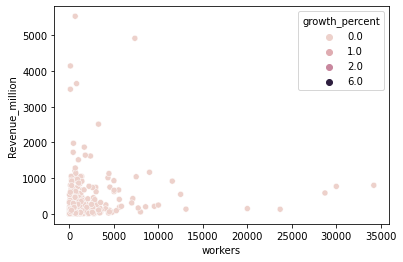

In [51]:
sns.scatterplot(data=df,x='workers',y='Revenue_million',hue='growth_percent')

<Axes: xlabel='workers', ylabel='Revenue_million'>

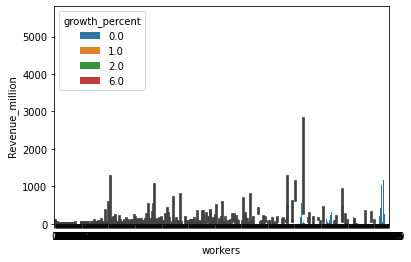

In [53]:
sns.barplot(data=df,x='workers',y='Revenue_million',hue='growth_percent')

In [39]:
df.skew()

<ipython-input-39-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


workers            19.835568
Revenue_million    17.002108
growth_percent     43.116406
dtype: float64

## Apply Statistical tests

In [40]:
from scipy.stats import mannwhitneyu


In [41]:
# apply the Mann-Whitney U test
statistic, p_value = mannwhitneyu(df['Revenue_million'], df['growth_percent'])


In [42]:
# print the test results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 24998410.5
p-value: 0.0


In [43]:
from scipy.stats import kruskal


In [44]:
# apply the Kruskal-Wallis H test
statistic, p_value = kruskal(df['Revenue_million'], df['growth_percent'])

In [45]:
# print the test results
print("Kruskal-Wallis H statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis H statistic: 8558.880311369532
p-value: 0.0


### According to these null hypothesis is zero in both above tests

# 2.1 • Design of a diagram showing relationships amongst the identified variables.


# 2.1.1

In [46]:
df.corr()

,workers,Revenue_million,growth_percent
workers,1.000000,0.265699,-0.001804
Revenue_million,0.265699,1.000000,0.012868
growth_percent,-0.001804,0.012868,1.000000


# 2.1.2

<Axes: >

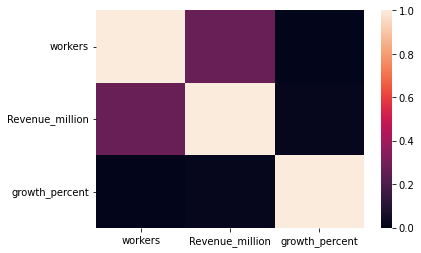

In [47]:
sns.heatmap(df.corr())

# 2.1.3

In [48]:
df[(df['state_l']=='California') & (df['Revenue_million']>=52.09)]

,workers,company,state_l,industry,Revenue_million,growth_percent
0,227,Fuhu,California,Consumer Products & Services,195.64,6.0
1,191,Quest Nutrition,California,Food & Beverage,82.64,2.0
16,436,American Solar Direct,California,Energy,52.09,0.0
108,37,Apex Fuels,California,Energy,134.57,0.0
113,73,AdColony,California,Advertising & Marketing,52.78,0.0
...,...,...,...,...,...,...
4706,160,Tempest Telecom Solutions,California,Telecommunications,57.45,0.0
4709,780,Yodlee,California,Financial Services,70.16,0.0
4776,650,Neudesic,California,IT Services,80.39,0.0
4794,102,Entisys Solutions,California,IT Services,70.56,0.0
